Date Created: Apr 13, 2022 @ 13.35 mst

---

# **Overview:**

---

The notebook is outlined as follows:

    Part 1: Legendre-Gauss Quadrature
    
    Part 2: Error and Approx. of Order 26

**Questions:** 

    - tensors

    - higher dim.
    
    - Differential Quadrature

In [1]:
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from numpy import linalg as LA
from scipy.special import legendre, roots_legendre, eval_legendre

%matplotlib notebook 

plt.style.use('bmh')

---
## Part I: Legendre-Gauss Quadrature

Summary: Loops up to some specified order and plots each Legendre Polynomial along the way.

---

In [2]:
def gaussian_quadrature(func, order, lower, upper):
    solution = (upper - lower)*.5*np.sum(weights*func(((upper - lower)*roots + (upper + lower))*.5))
    return solution

#### Legendre Plots

<IPython.core.display.Javascript object>


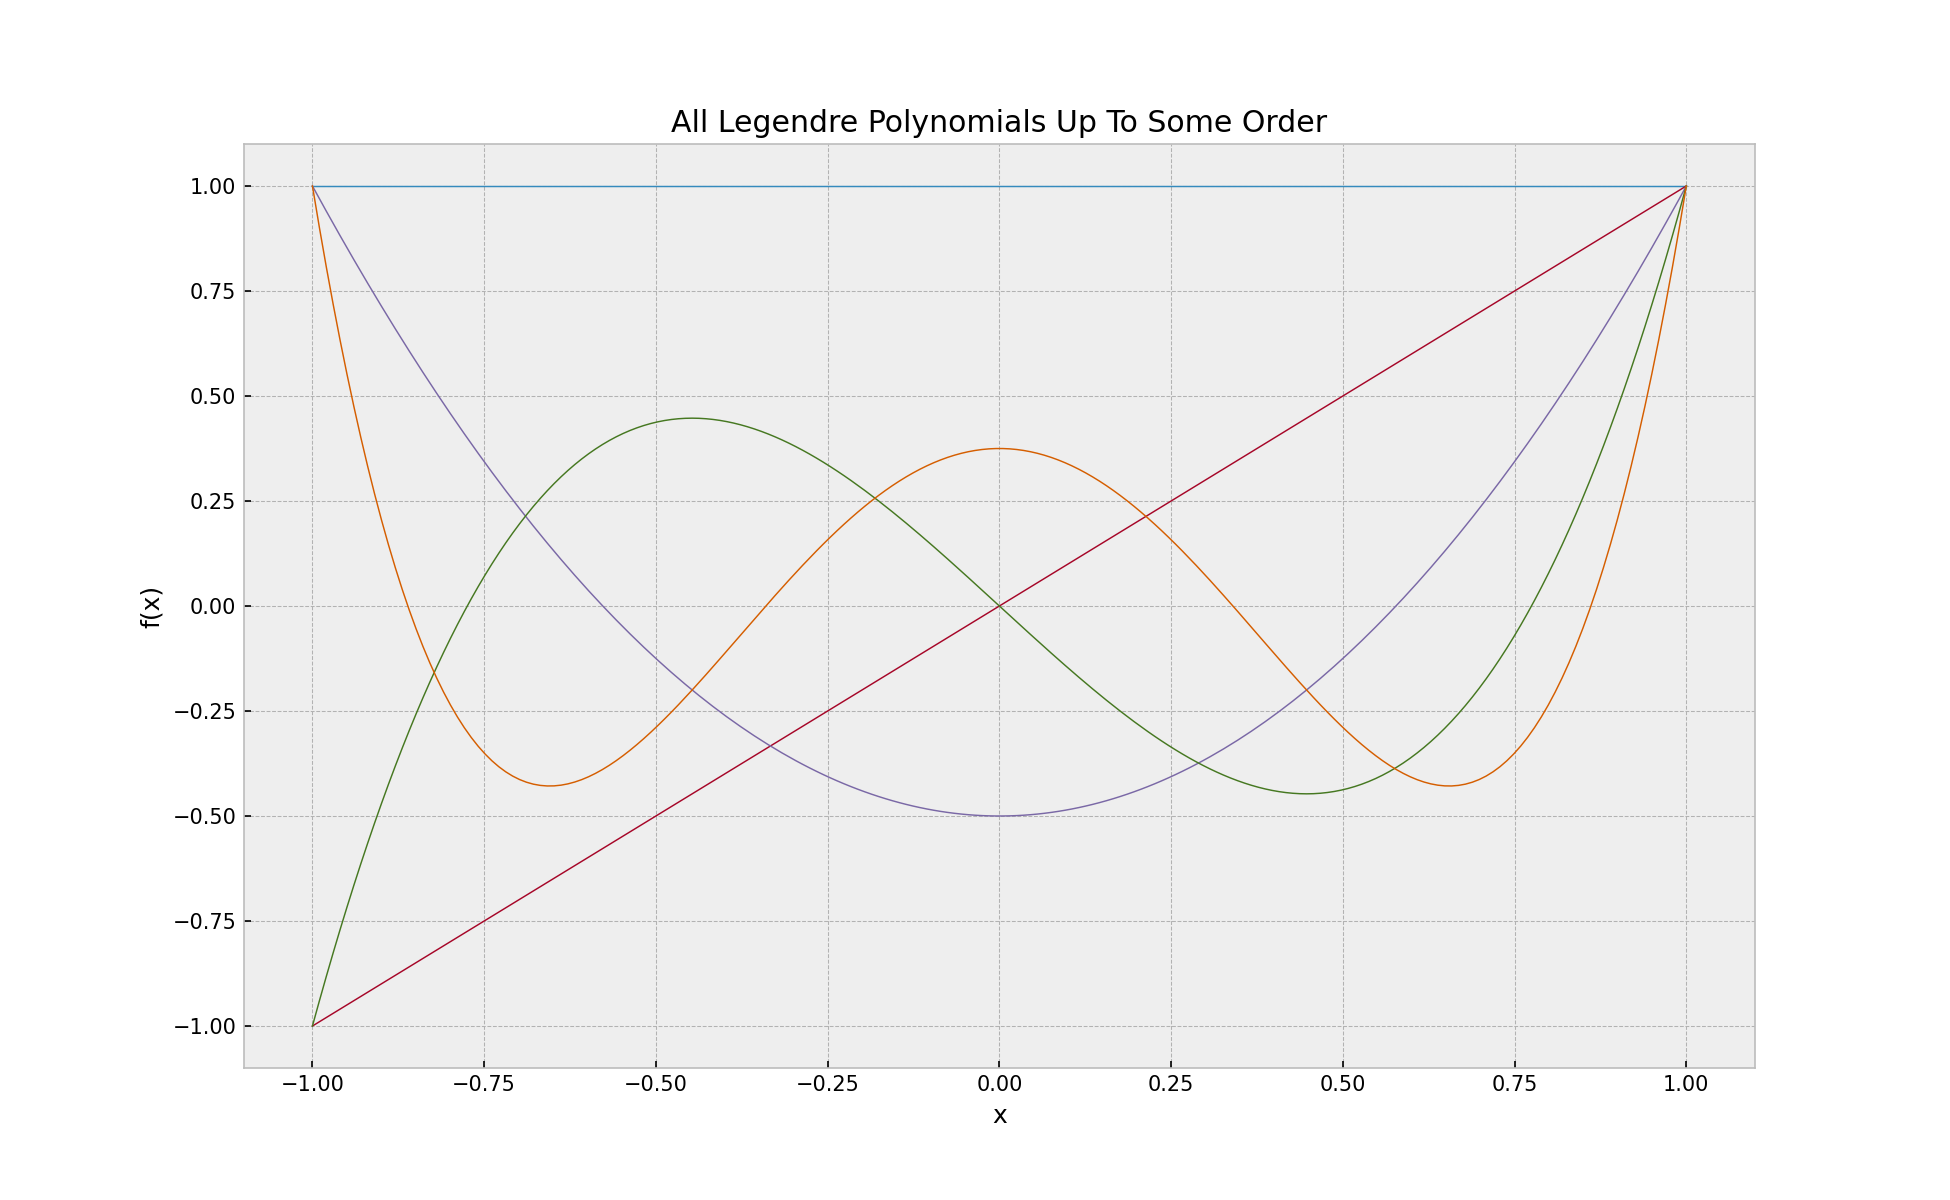

In [3]:
new_xaxis = np.linspace(-1, 1, 200)

def plot_legendre(order):
    for i in range(order):
        plt.figure('leg_poly_plot', figsize=(13,8))
        plt.title('All Legendre Polynomials Up To Some Order')
        plt.ylabel('f(x)')
        plt.xlabel('x')
        plt.plot(new_xaxis, legendre(i)(new_xaxis), linewidth='0.7')
        plt.show() 
        

plot_legendre(5)

#### Single Legendre Polynomial

<IPython.core.display.Javascript object>


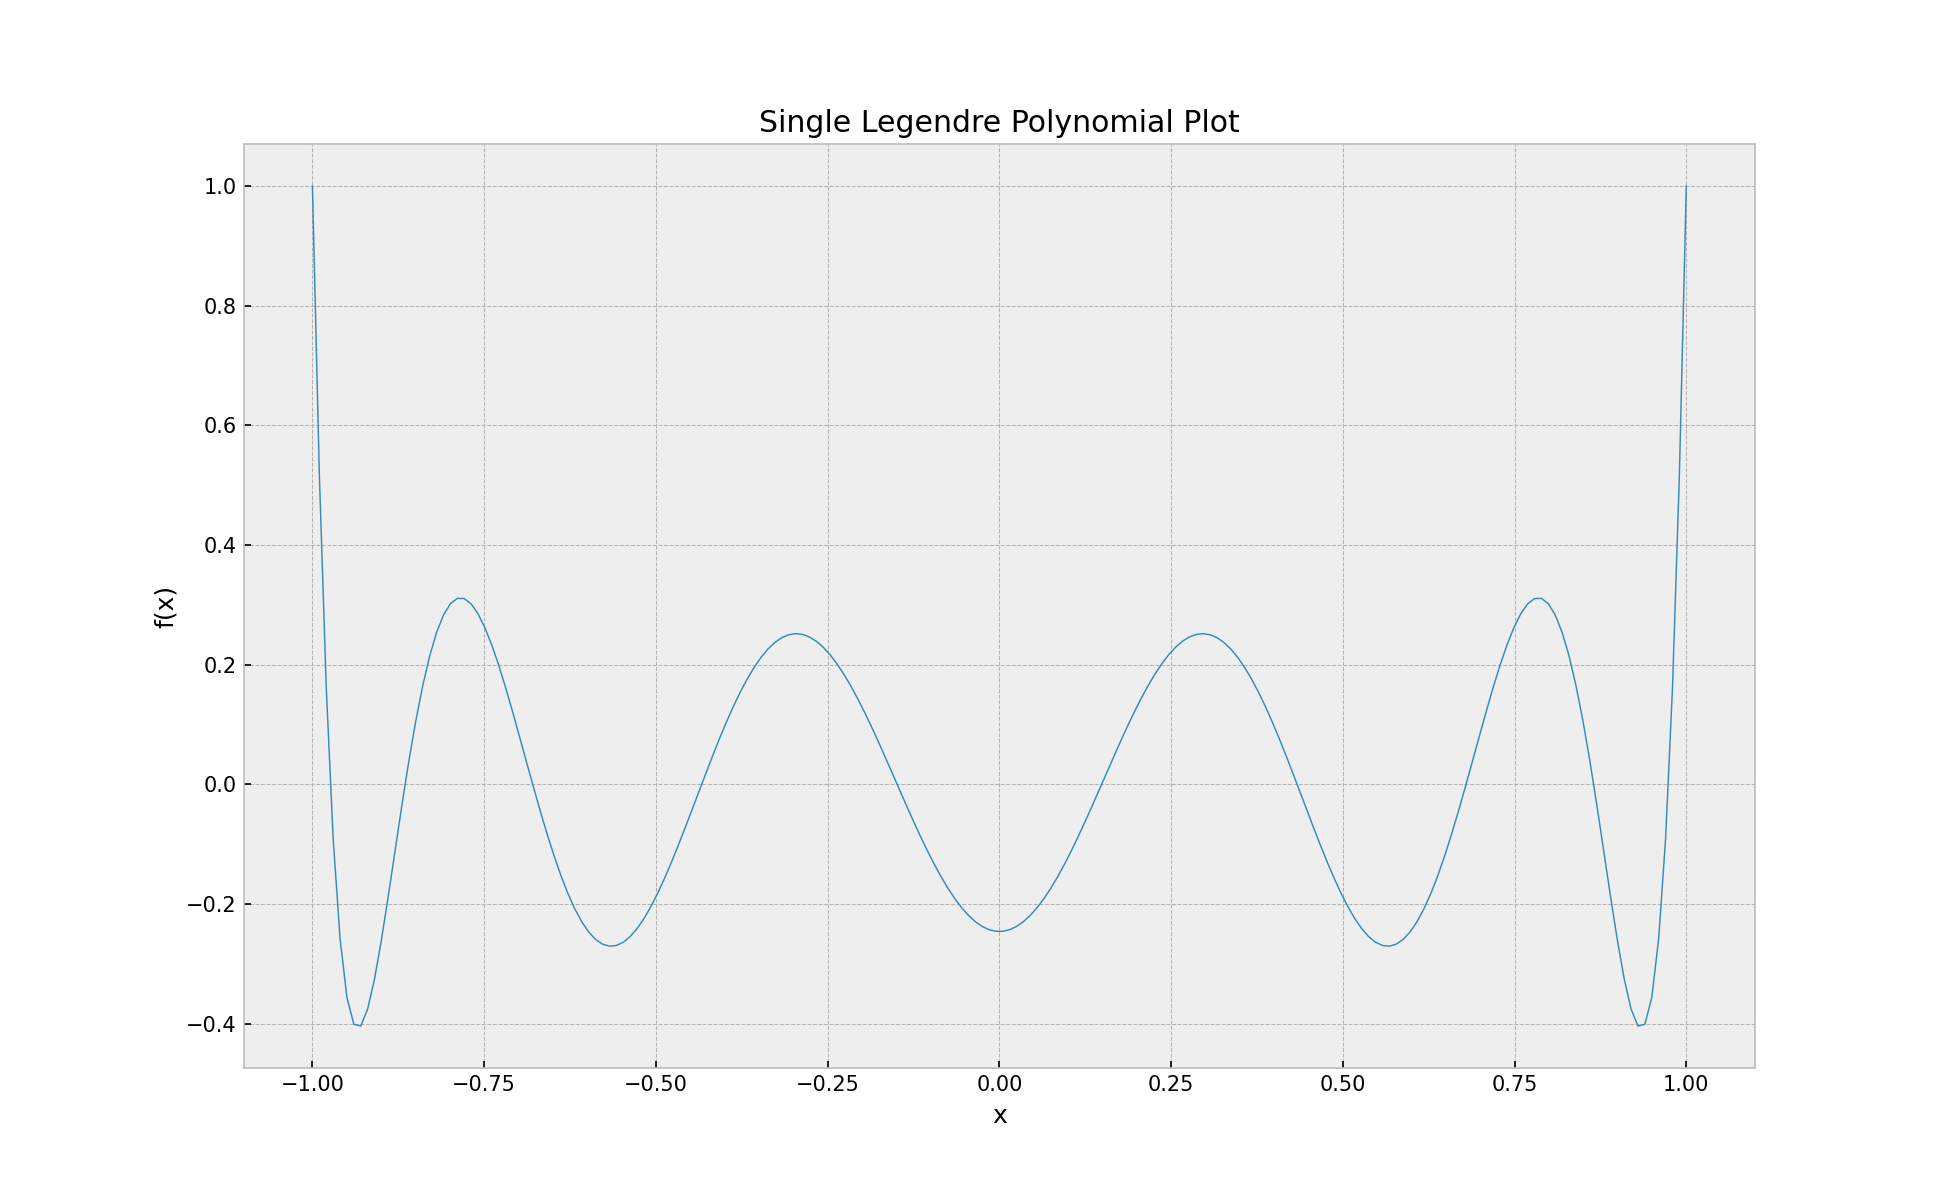

In [4]:
plt.figure('leg_poly_single_plot', figsize=(13,8))
plt.title('Single Legendre Polynomial Plot')
plt.ylabel('f(x)')
plt.xlabel('x')
plt.plot(new_xaxis, legendre(10)(new_xaxis), linewidth='0.7')

#### Define a function

In [5]:
def func(x):
    return np.exp(-x)*np.sin(4*x)**2


exact = 0.9899352767719962


def plot_quad(order):
    upper = 1
    lower = -1
    roots, weights = roots_legendre(order) # generate Legendre
    yaxis = func(roots)
    xaxis = np.linspace(lower, upper, 200)
    best_fit = np.poly1d(np.polyfit(roots, yaxis, order))
    print(' - Order: ', order, 'from', lower, 'to', upper) 
    print(' - roots: ', roots) 
    print(' - weights: ', weights) 
    print(' - poly1d best fit line: \n', best_fit, '\n')

    plt.figure(figsize=(13, 4))
    plt.subplot(111)
    plt.ylabel('f(x)')
    plt.xlabel('x axis')
    plt.plot(xaxis, func(xaxis), color='blue', linewidth='1')
    plt.plot(xaxis, best_fit(xaxis), color='orange', linewidth='1')
    plt.scatter(roots, func(roots), color='red', s=40)
    plt.bar(roots, func(roots), 0.008, color='orange')
    plt.fill_between(xaxis, best_fit(xaxis), color='orange', alpha=0.3)
    return

### Loop to Show Plots

Summary: plot the least square approx. for every other order value between 3 and 15 and compared to the actual plot of the function.

--- Iteration:  3  ---
 - Order:  3 from -1 to 1
 - roots:  [-0.77459667  0.          0.77459667]
 - weights:  [0.55555556 0.88888889 0.55555556]
 - poly1d best fit line: 
            3           2
-0.001715 x + 0.00409 x - 0.001029 x - 2.504e-19 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


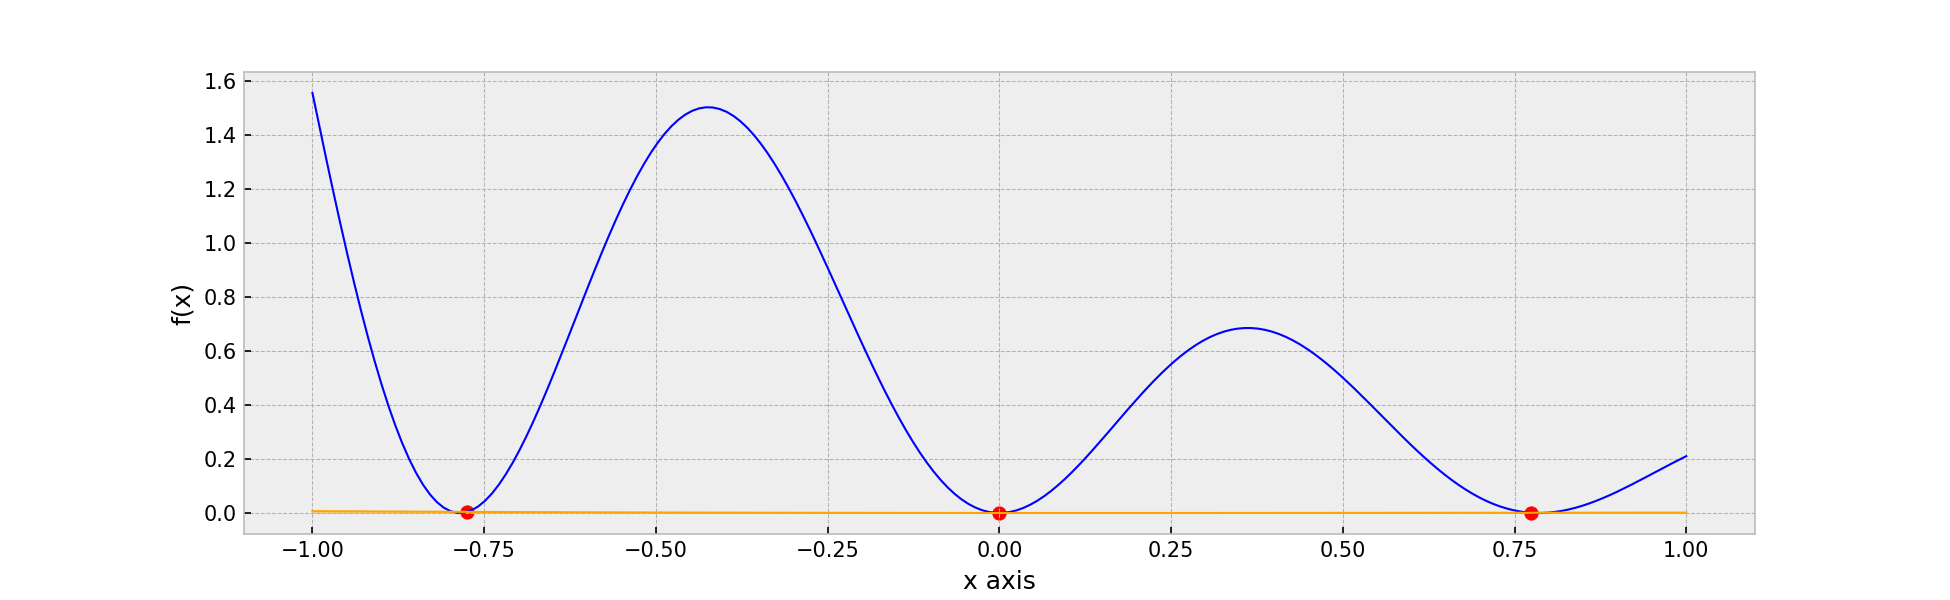

--- Iteration:  5  ---
 - Order:  5 from -1 to 1
 - roots:  [-0.90617985 -0.53846931  0.          0.53846931  0.90617985]
 - weights:  [0.23692689 0.47862867 0.56888889 0.47862867 0.23692689]
 - poly1d best fit line: 
        5         4           3        2
0.737 x - 4.484 x + 0.09305 x + 4.06 x - 0.8199 x - 1.893e-16 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


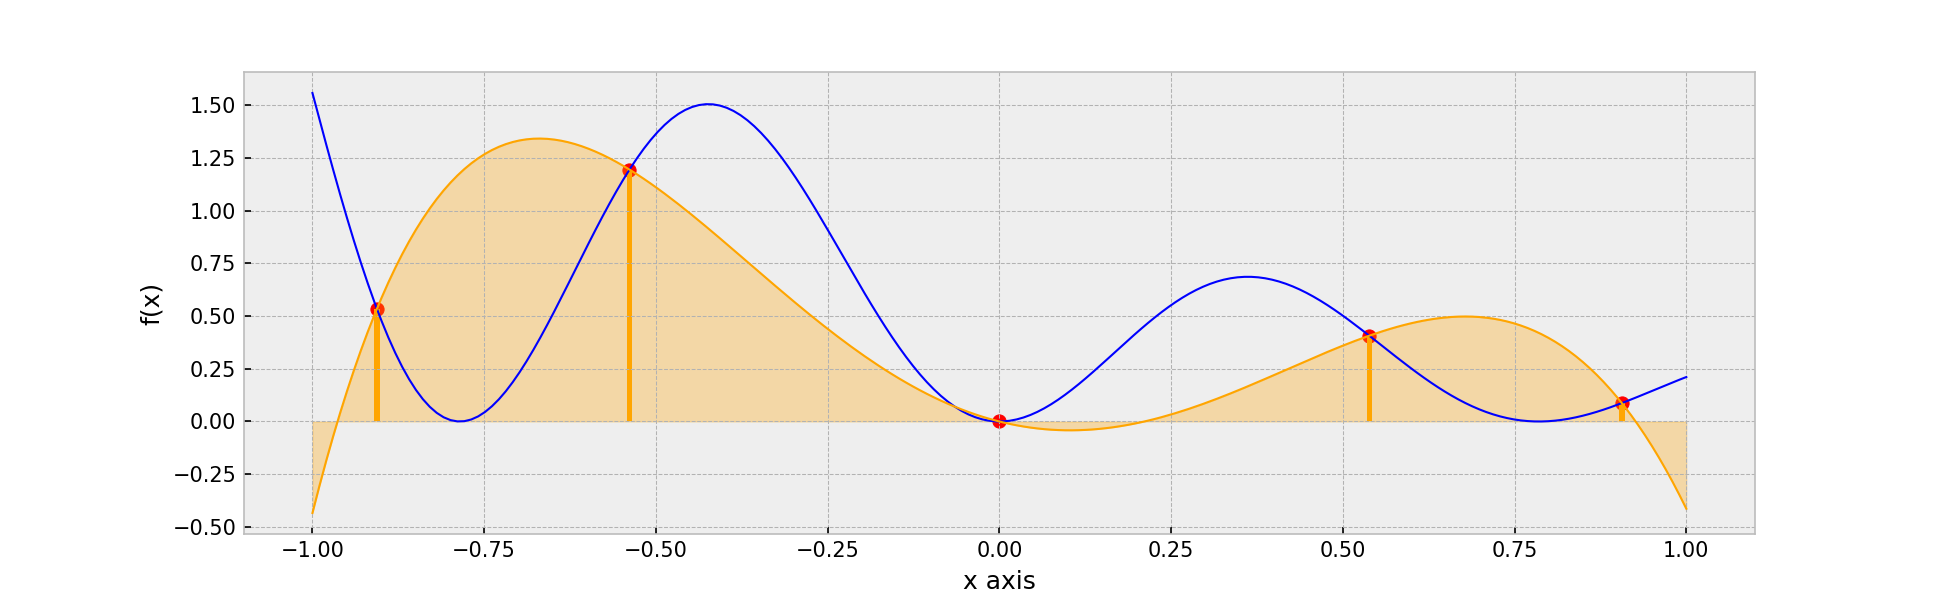

--- Iteration:  7  ---
 - Order:  7 from -1 to 1
 - roots:  [-0.94910791 -0.74153119 -0.40584515  0.          0.40584515  0.74153119
  0.94910791]
 - weights:  [0.12948497 0.27970539 0.38183005 0.41795918 0.38183005 0.27970539
 0.12948497]
 - poly1d best fit line: 
         7         6          5        4         3        2
-3.578 x + 24.98 x + 0.7506 x - 34.7 x + 3.541 x + 11.6 x - 1.612 x + 5.539e-15 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


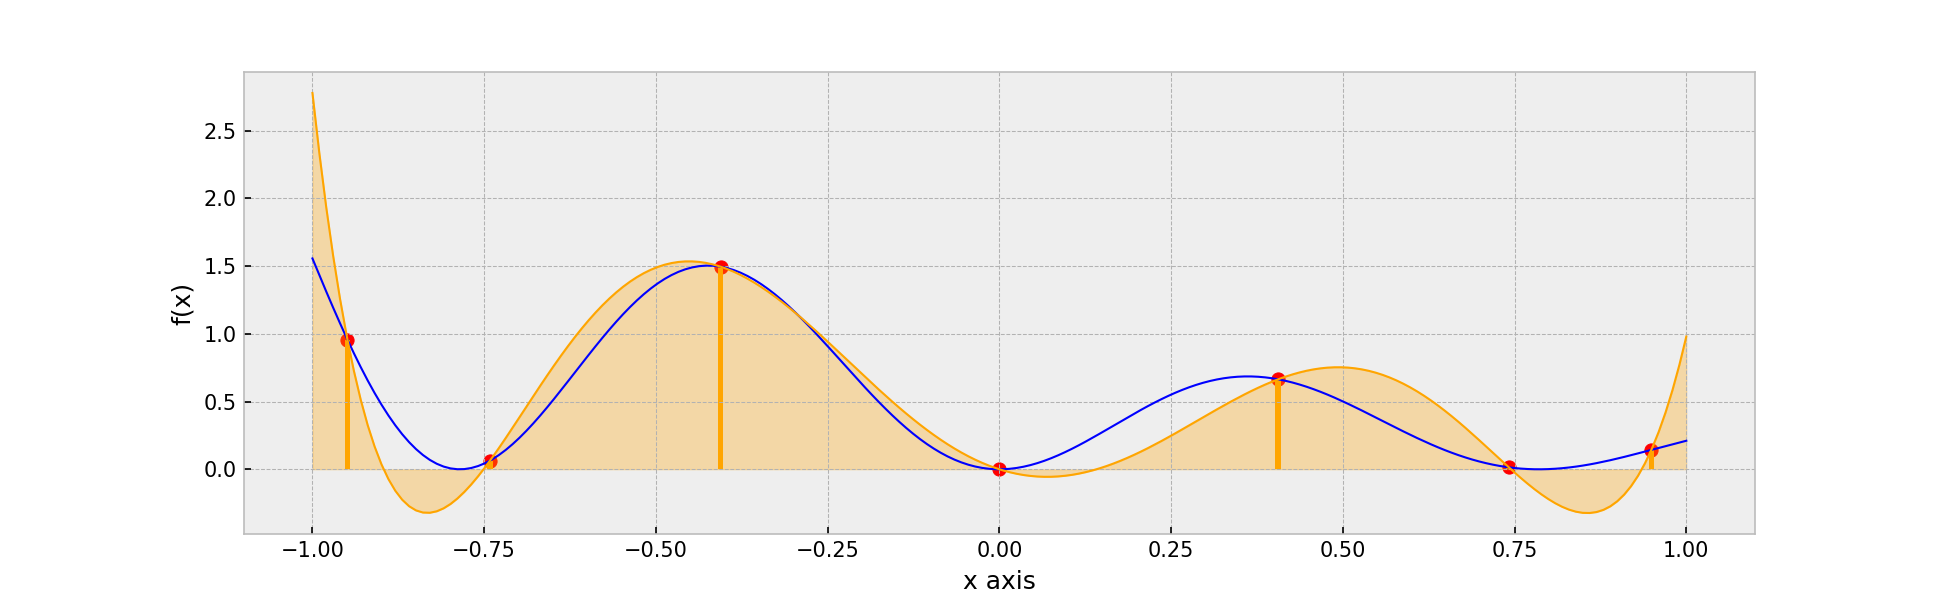

--- Iteration:  9  ---
 - Order:  9 from -1 to 1
 - roots:  [-0.96816024 -0.83603111 -0.61337143 -0.32425342  0.          0.32425342
  0.61337143  0.83603111  0.96816024]
 - weights:  [0.08127439 0.18064816 0.2606107  0.31234708 0.33023936 0.31234708
 0.2606107  0.18064816 0.08127439]
 - poly1d best fit line: 
        9         8          7         6         5         4         3
-2.47 x - 38.52 x - 0.1376 x + 88.92 x + 1.483 x - 64.92 x + 1.391 x
          2
 + 15.17 x - 1.105 x - 5.496e-15 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


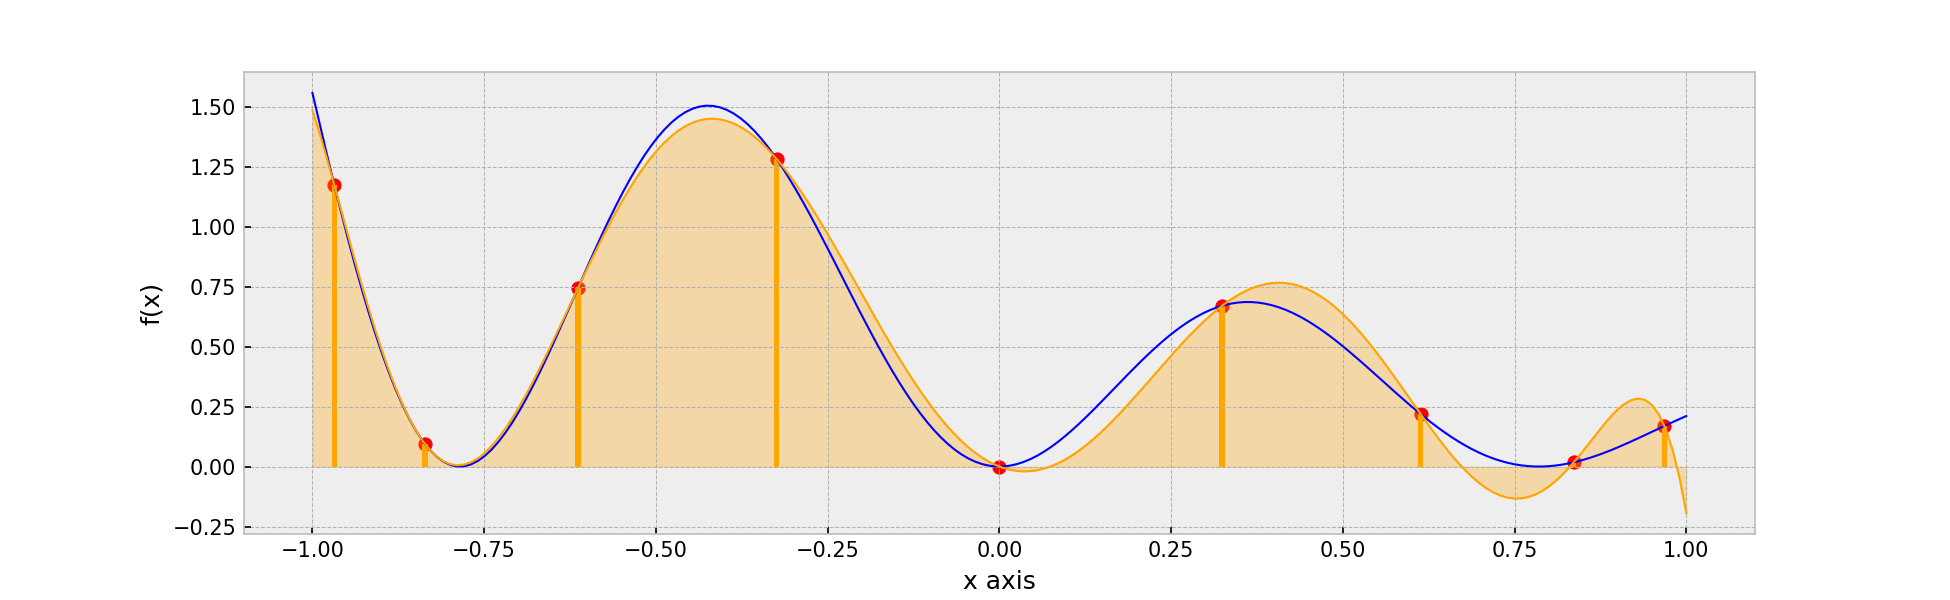

--- Iteration:  11  ---
 - Order:  11 from -1 to 1
 - roots:  [-0.97822866 -0.8870626  -0.73015201 -0.51909613 -0.26954316  0.
  0.26954316  0.51909613  0.73015201  0.8870626   0.97822866]
 - weights:  [0.05566857 0.12558037 0.18629021 0.23319376 0.26280454 0.27292509
 0.26280454 0.23319376 0.18629021 0.12558037 0.05566857]
 - poly1d best fit line: 
        11         10         9         8         7         6        5
17.98 x  + 27.13 x  - 23.26 x - 96.56 x - 12.84 x + 130.1 x + 24.8 x
          4         3         2
 - 75.67 x - 6.816 x + 15.92 x - 0.4159 x + 2.142e-15 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


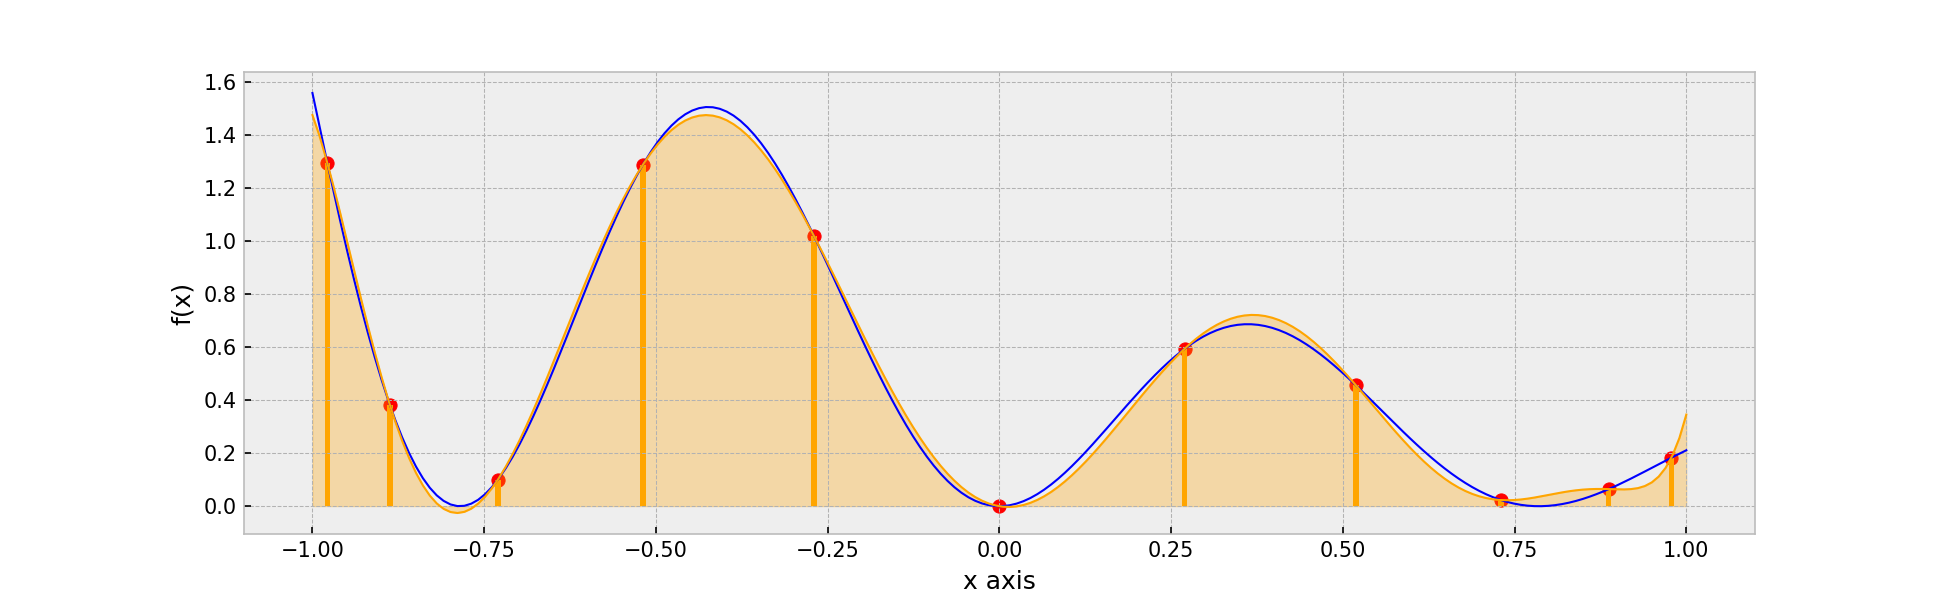

--- Iteration:  13  ---
 - Order:  13 from -1 to 1
 - roots:  [-0.98418305 -0.9175984  -0.80157809 -0.64234934 -0.44849275 -0.23045832
  0.          0.23045832  0.44849275  0.64234934  0.80157809  0.9175984
  0.98418305]
 - weights:  [0.040484   0.0921215  0.13887351 0.17814598 0.20781605 0.22628318
 0.23255155 0.22628318 0.20781605 0.17814598 0.13887351 0.0921215
 0.040484  ]
 - poly1d best fit line: 
         13         12         11         10        9         8
-27.22 x  - 9.422 x  + 58.76 x  + 51.86 x  - 8.27 x - 120.1 x
          7         6        5        4         3      2
 - 66.36 x + 139.8 x + 55.3 x - 77.3 x - 12.82 x + 16 x - 0.1053 x + 8.745e-15 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


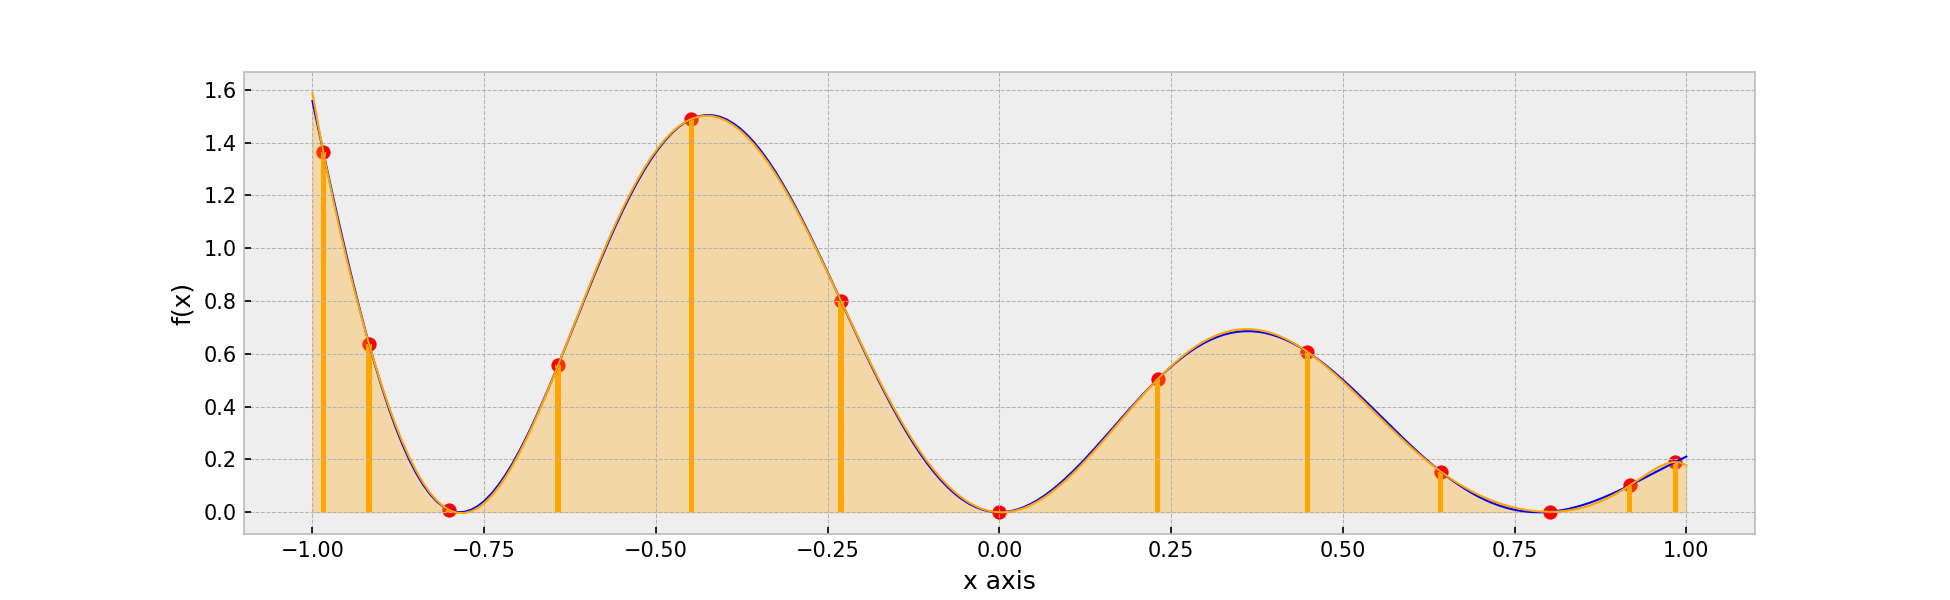

--- Iteration:  15  ---
 - Order:  15 from -1 to 1
 - roots:  [-0.98799252 -0.93727339 -0.84820658 -0.72441773 -0.57097217 -0.39415135
 -0.20119409  0.          0.20119409  0.39415135  0.57097217  0.72441773
  0.84820658  0.93727339  0.98799252]
 - weights:  [0.03075324 0.07036605 0.10715922 0.13957068 0.16626921 0.186161
 0.19843149 0.20257824 0.19843149 0.186161   0.16626921 0.13957068
 0.10715922 0.07036605 0.03075324]
 - poly1d best fit line: 
        15         14         13         12         11         10
24.18 x  + 0.908 x  - 72.29 x  - 12.22 x  + 52.35 x  + 55.15 x 
          9         8         7         6         5         4         3
 + 58.38 x - 121.9 x - 121.5 x + 140.3 x + 73.44 x - 77.35 x - 15.19 x
       2
 + 16 x - 0.02031 x - 3.325e-15 



/var/folders/yy/tgnx4yvs65n5w70kcy3_2b000000gn/T/ipykernel_13739/4121061522.py:5: RankWarning: Polyfit may be poorly conditioned
  plot_quad(i)


<IPython.core.display.Javascript object>


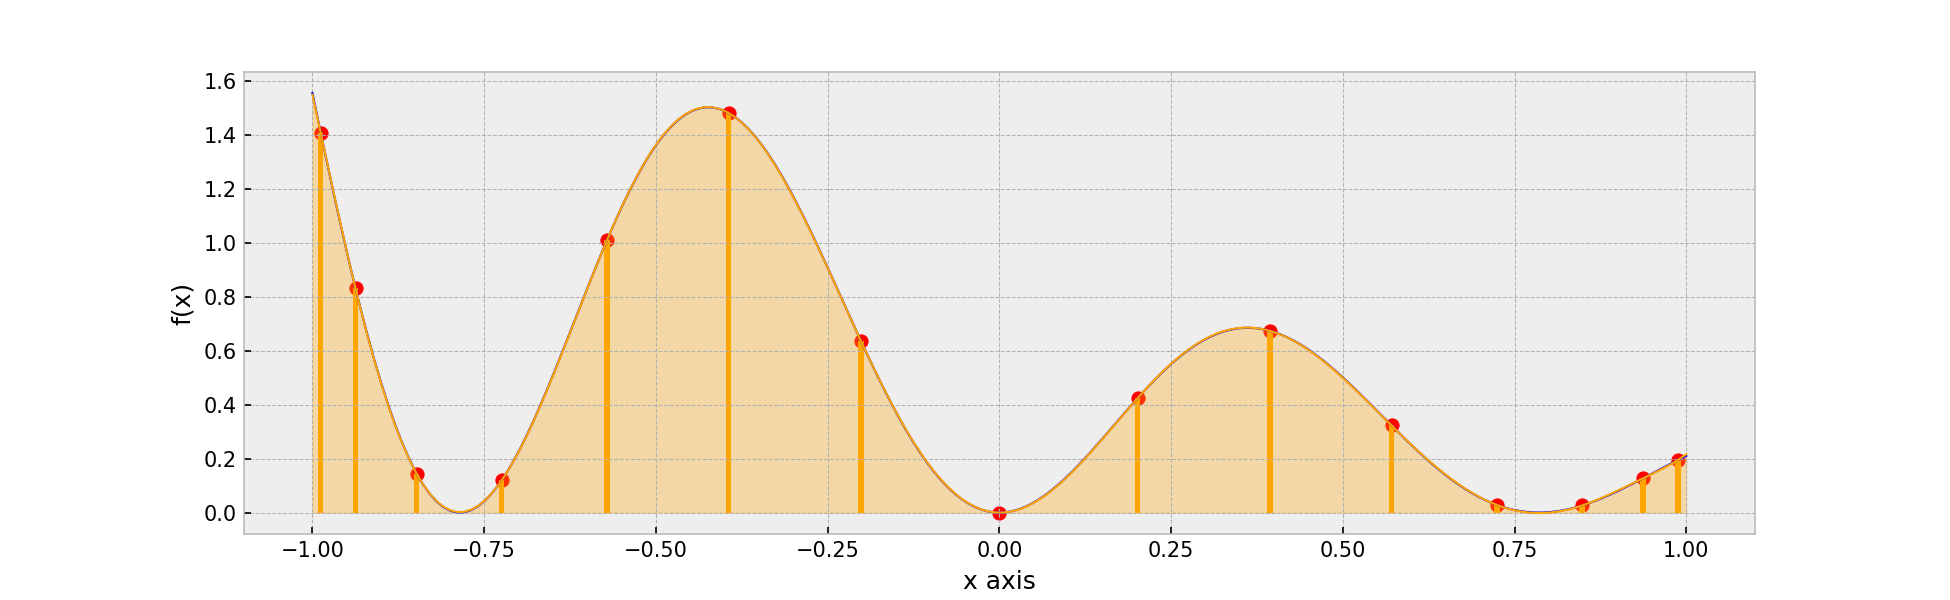

In [6]:
order = 16

for i in range(3,order, 2):
    print('--- Iteration: ', i, ' ---')
    plot_quad(i)

___
## Part II: Approximation of Order 26
Summary: Plot the approximation of order 26 and show the error of all orders from 3 to 26.
___

 - Order:  26 from -1 to 1
 - roots:  [-0.9958857  -0.97838545 -0.94715907 -0.90263786 -0.84544594 -0.77638595
 -0.69642726 -0.60669229 -0.50844071 -0.40305176 -0.29200484 -0.17685882
 -0.05923009  0.05923009  0.17685882  0.29200484  0.40305176  0.50844071
  0.60669229  0.69642726  0.77638595  0.84544594  0.90263786  0.94715907
  0.97838545  0.9958857 ]
 - weights:  [0.01055137 0.02441785 0.03796238 0.05097583 0.06327405 0.07468415
 0.08504589 0.0942138  0.10205916 0.10847184 0.11336182 0.11666044
 0.11832142 0.11832142 0.11666044 0.11336182 0.10847184 0.10205916
 0.0942138  0.08504589 0.07468415 0.06327405 0.05097583 0.03796238
 0.02441785 0.01055137]
 - poly1d best fit line: 
          26             25          24            23         22
0.02157 x  + 0.0001493 x  - 0.1351 x  - 0.004004 x  + 0.357 x 
            21          20          19         18         17         16
 + 0.05401 x  - 0.4234 x  - 0.4824 x  - 0.323 x  + 3.092 x  + 2.615 x 
          15         14         13        

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3361: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


<IPython.core.display.Javascript object>


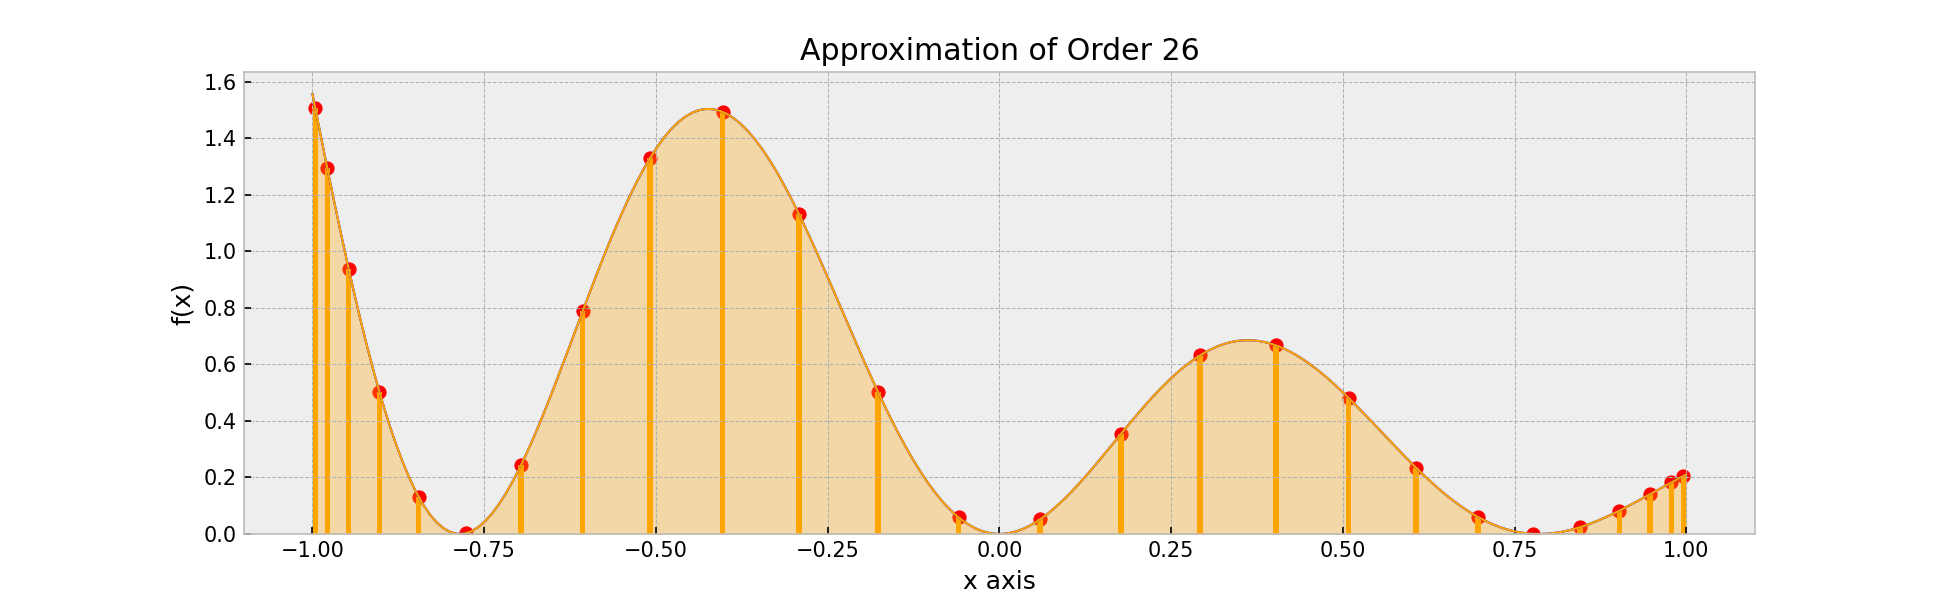

--- Solution/Error ---
 - exact solution:  0.9899352767719962
 - approx. solution:  0.9899352767719963
 - Error:  1.1102230246251565e-16


<IPython.core.display.Javascript object>


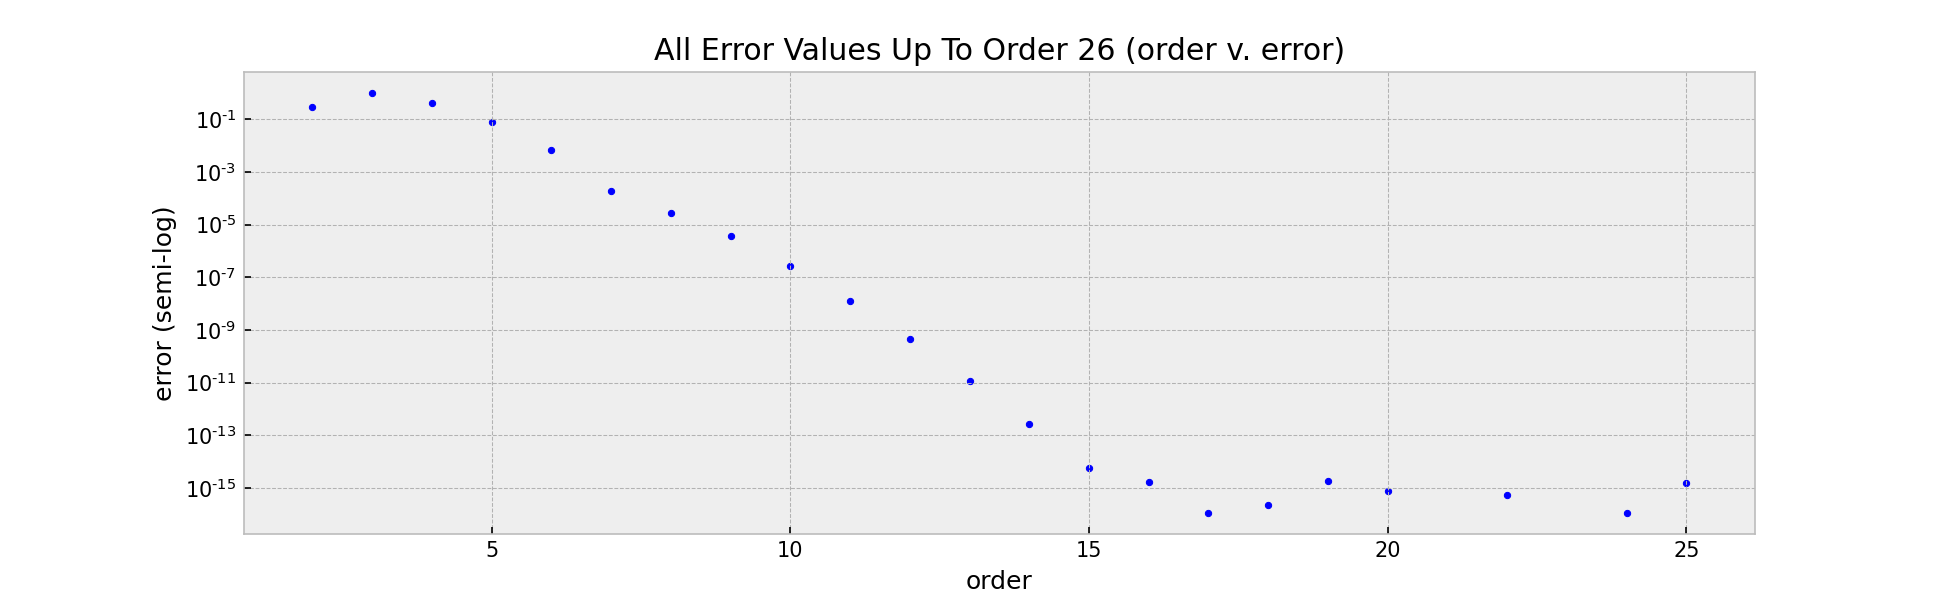

In [7]:
order = 26
upper = 1
lower = -1

roots, weights = roots_legendre(order) # generate Legendre
yaxis = func(roots)
xaxis = np.linspace(lower, upper, 200)
best_fit = np.poly1d(np.polyfit(roots, yaxis, order))
g_quad = gaussian_quadrature(func, order, lower=-1, upper=1)

print(' - Order: ', order, 'from', lower, 'to', upper) 
print(' - roots: ', roots) 
print(' - weights: ', weights) 
print(' - poly1d best fit line: \n', best_fit, '\n')

plt.figure(figsize=(13, 4))
plt.subplot(111)
plt.title('Approximation of Order 26')
plt.ylabel('f(x)')
plt.xlabel('x axis')
plt.plot(xaxis, func(xaxis), color='blue', linewidth='1')
plt.plot(xaxis, best_fit(xaxis), color='orange', linewidth='1')
plt.scatter(roots, func(roots), color='red', s=40)
plt.bar(roots, func(roots), 0.008, color='orange')
plt.fill_between(xaxis, best_fit(xaxis), color='orange', alpha=0.3)


print('--- Solution/Error ---') 
print(' - exact solution: ', exact)
print(' - approx. solution: ', g_quad)
print(' - Error: ', g_quad - exact)


error_order = 26

plt.figure(figsize=(13, 4)) 
plt.title('All Error Values Up To Order 26 (order v. error)')
plt.ylabel('error (semi-log)')
plt.xlabel('order')

for i in range(2, error_order):
    upper = 1
    lower = -1
    roots, weights = roots_legendre(i)
    yaxis = func(roots)
    xaxis = np.linspace(lower, upper, 200)
    g_quad = gaussian_quadrature(func, i, lower=-1, upper=1)
    error = np.abs(exact - g_quad)
    plt.semilogy()
    plt.scatter(i, error, color='b', s=9)

links: 
    
    Nonnegative tensor factorization - https://friedlander.io/files/pdf/2007FriedlanderHatz.pdf